In [2]:
import re
import numpy as np
from numpy import array
import csv
import random
import pandas as pd
import re
from urllib.parse import unquote

data = pd.read_csv('emcl_extract_bi.csv')
X = data[['method','uri','query','protocol','host','connection','accept',
'accept_charset','accept_language','cache_control','cookie','pragma','user_agent','content_length','content_type']]
y = data['label']

X_string = []
cols = X.columns
for i in range(len(X)):
    temp = ''
    for col in cols:
        temp += " " + str(X.iloc[i][col])
    ans = ''
    for t in temp:
        ans += t
    
    
    ans =  unquote(ans)
    
    ans = ans.lower()
    
    special_chars = ['/','&','=','+', ';', ',']
    for char in special_chars:
      ans = ans.replace(char, ' ')
    
    
    # Xóa các khoảng trắng thừa
    ans = ' '.join(ans.split())

    X_string.append(ans)
    

In [3]:
print(X_string[154])

put j.t.passthruy2perlartzq.s xamj eykrkw6mrz7ip_ 93osesewhnbuensesi.bin nan http 1.0 www.rt7hoa.cz close * * utf-8 ar-s q 0.1 r-hyha q 0.1 nayi ssr jtlikehmykfzz c< tnruqusln sq34y@45xqa ltud9 38518 wawdeplysn 16 9airq2 copyt5a a5 dartoeta taoupeabin 115.0 application x-www-form-urlencoded


In [4]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(filters = '', num_words = 3000)
tokenizer.fit_on_texts(X_string)


sequences = tokenizer.texts_to_sequences(X_string)
pad = pad_sequences(sequences,padding='post')

print(len(pad))
print(len(pad[1]))
print(pad[0])

50116
65
[  5 601   3   4   8  14   2   2 125 135 114 111   2  31   9 210  37  83
 252  45  42  41   3   3   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]


In [5]:
import random
import numpy as np

def da_sana_algorithm(dataset, sequences, f):

    au_dataset = []
    L = [len(req) for req in dataset]
    L_min = min(L)
    L_max = max(L)
    mean = (f + 2*f) / 2
    stddev = (2*f - f) / 4

    for request, Si  in zip(dataset, sequences ):

        length = len(request)
        L_normalized = (length - L_min) / (L_max - L_min)


        Ci = np.random.binomial(1, L_normalized*0.05 ,len(Si))

        Ni_Gauss = np.random.normal(mean, stddev, len(Si))
        Ni = abs(Ni_Gauss).astype(int)
        

        au_dataset.append(np.array(Si)*(Ci^1) + Ni*Ci)


    return au_dataset

In [6]:

au_seq = np.array([*pad, *da_sana_algorithm(X_string,pad,3000)])
lable = np.array([*y,*y]).astype(np.int32)

print(au_seq.shape)
print(lable.shape)
print(type(lable[0]))

print(au_seq[3])

(100232, 65)
(100232,)
<class 'numpy.int32'>
[   5  744   47   49   49   74 1334    4    7   14    2    2    1   23
  143    1   19  124    1   17  103   98    1   15  115    1   16   35
   75   33    3    3    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]


In [7]:
labels={'Valid':0, 'Invalid':1}

In [15]:
from keras import models
from keras import layers
from keras.layers import Embedding, Dense, Dropout, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.metrics import accuracy_score

# split the data into training, validation, and testing sets
train_X, test_X, train_y, test_y = train_test_split(au_seq, lable, test_size=0.2, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.25, random_state=42)

# size of the vector space in which characters will be embedded
embedding_dim = 16
max_chars = 10000

def build_model():
    model = Sequential()
    model.add(Embedding(max_chars, embedding_dim, input_length=train_X.shape[1]))
    model.add(Bidirectional(LSTM(units=128, activation='tanh', dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
    model.add(Bidirectional(LSTM(units=128, activation='tanh', dropout=0.5, recurrent_dropout=0.5)))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
    return model

model = build_model()
print(model.summary())

model.fit(train_X, train_y, epochs=10, batch_size=128, validation_data=(val_X, val_y))

test_loss, test_acc = model.evaluate(test_X, test_y)
print("Test Accuracy:", test_acc)

# Predicting labels for test data
y_pred = np.argmax(model.predict(test_X), axis=-1)

# Calculating accuracy for each label
accuracy_per_label = {}
for label in labels:
    indices = np.where(test_y == labels[label])
    accuracy_per_label[label] = accuracy_score(test_y[indices], y_pred[indices])

print("Accuracy per Label:", accuracy_per_label)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 65, 16)            160000    
                                                                 
 bidirectional_12 (Bidirecti  (None, 65, 256)          148480    
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 256)              394240    
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 2)                 514       
                                                                 
Total params: 703,234
Trainable params: 703,234
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
470/470 [=======================

              precision    recall  f1-score   support

       Valid       0.95      0.99      0.97     13915
     Invalid       0.98      0.89      0.94      6132

    accuracy                           0.96     20047
   macro avg       0.97      0.94      0.95     20047
weighted avg       0.96      0.96      0.96     20047



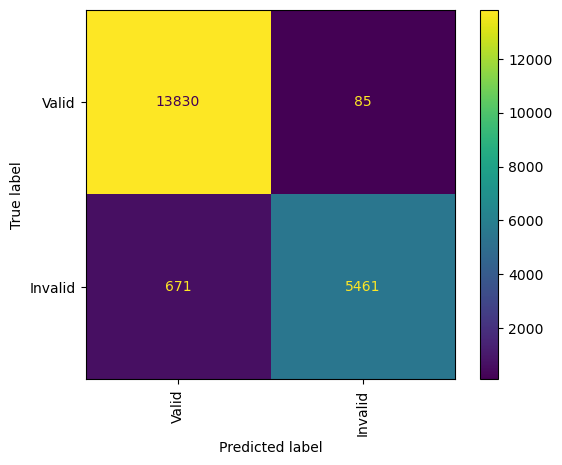

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

print(classification_report(test_y, y_pred, target_names=labels))

ConfusionMatrixDisplay.from_predictions(test_y, y_pred, display_labels= labels, xticks_rotation = 'vertical')
